In [74]:
#import python libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [75]:
import warnings 
warnings.filterwarnings('ignore')

In [76]:
#deep learning libaries

from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.utils import plot_model
from glob import glob
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Softmax
from tensorflow.keras.optimizers import Adam

In [77]:
#image size and data paths

IMAGE_SIZE = [224, 224]
valid_dir = r'C:\Users\DELL\Desktop\python project\Deep Learning\Car Brand Detector\dataset\Images\Test'
train_dir = r'C:\Users\DELL\Desktop\python project\Deep Learning\Car Brand Detector\dataset\Images\Train'

In [78]:
#building the model
resnet = ResNet50(include_top = False, input_shape = IMAGE_SIZE + [3], weights = 'imagenet')

In [79]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [80]:
for layer in resnet.layers:
    layer.trainable = False

In [81]:
folder = glob(r'C:\Users\DELL\Desktop\python project\Deep Learning\Car Brand Detector\dataset\Images\Train\*')

In [82]:
folder

['C:\\Users\\DELL\\Desktop\\python project\\Deep Learning\\Car Brand Detector\\dataset\\Images\\Train\\audi',
 'C:\\Users\\DELL\\Desktop\\python project\\Deep Learning\\Car Brand Detector\\dataset\\Images\\Train\\lamborghini',
 'C:\\Users\\DELL\\Desktop\\python project\\Deep Learning\\Car Brand Detector\\dataset\\Images\\Train\\mercedes']

In [83]:
#adding the layers

x = Flatten()(resnet.output)

In [84]:
#creating output layer

prediction = Dense(len(folder), activation = 'softmax')(x)

In [85]:
#creating the model

model = Model(inputs = resnet.input, outputs = prediction)

In [86]:
model

In [87]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [88]:
#compiling the model

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [89]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [90]:
train_data_generator = ImageDataGenerator(rescale = 1./ 255,
                                          shear_range = 0.2, 
                                          zoom_range = 0.2, 
                                          horizontal_flip = True)

test_data_generator = ImageDataGenerator(rescale = 1./ 255)

In [91]:
training_set = train_data_generator.flow_from_directory( r'C:\Users\DELL\Desktop\python project\Deep Learning\Car Brand Detector\dataset\Images\Train',
                                                        target_size = (224, 224), batch_size = 32, class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [92]:
test_set = test_data_generator.flow_from_directory( r'C:\Users\DELL\Desktop\python project\Deep Learning\Car Brand Detector\dataset\Images\Test',
                                                   target_size = (224, 224), batch_size = 32, class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [93]:
#applying the model

r = model.fit_generator(training_set, 
                        validation_data = test_set,
                        epochs = 50,
                        steps_per_epoch = len(training_set),
                        validation_steps = len(test_set))

Epoch 1/50
2/2 [==============================] - 58s 32s/step - loss: 7.5111 - accuracy: 0.2969 - val_loss: 4.6824 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 45s 30s/step - loss: 7.7835 - accuracy: 0.3281 - val_loss: 5.4536 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 22s 16s/step - loss: 7.1109 - accuracy: 0.3281 - val_loss: 9.9395 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 23s 16s/step - loss: 6.7230 - accuracy: 0.3438 - val_loss: 1.6691 - val_accuracy: 0.2069
Epoch 5/50
2/2 [==============================] - 28s 21s/step - loss: 1.8229 - accuracy: 0.4688 - val_loss: 3.0270 - val_accuracy: 0.3966
Epoch 6/50
2/2 [==============================] - 48s 33s/step - loss: 4.6776 - accuracy: 0.5000 - val_loss: 3.4975 - val_accuracy: 0.6034
Epoch 7/50
2/2 [==============================] - 47s 33s/step - loss: 5.0631 - accuracy: 0.5000 - val_loss: 2.7235 - val_accuracy: 0.4310
Epoch 8/50
2/2 [===========

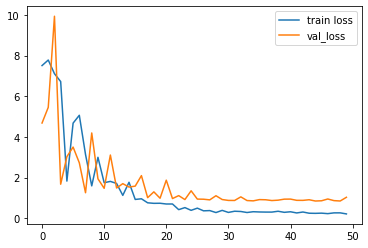

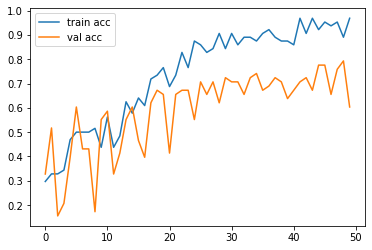

<Figure size 432x288 with 0 Axes>

In [94]:
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plotting the accuracy 

plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [95]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [96]:
y_pred = model.predict(test_set)

2/2 [==============================] - 14s 4s/step


In [97]:
y_pred

array([[1.79419033e-02, 2.69222707e-01, 7.12835312e-01],
       [1.22975269e-02, 8.89881015e-01, 9.78214443e-02],
       [1.85246568e-03, 9.51609492e-01, 4.65379059e-02],
       [3.45124342e-02, 2.69227266e-01, 6.96260273e-01],
       [7.12118344e-03, 8.46750200e-01, 1.46128714e-01],
       [5.76987565e-01, 3.87552738e-01, 3.54595967e-02],
       [1.44816681e-06, 2.28231147e-04, 9.99770403e-01],
       [7.88377047e-01, 7.07444772e-02, 1.40878409e-01],
       [6.18120888e-03, 7.99056649e-01, 1.94762096e-01],
       [2.94229425e-02, 2.84879897e-02, 9.42089021e-01],
       [1.75159380e-01, 6.78291202e-01, 1.46549433e-01],
       [1.15180828e-01, 1.73145667e-01, 7.11673498e-01],
       [2.48918161e-02, 4.70202953e-01, 5.04905343e-01],
       [1.83037284e-03, 1.21668242e-01, 8.76501441e-01],
       [4.16449038e-03, 1.81288481e-01, 8.14546943e-01],
       [1.75707377e-02, 8.48522067e-01, 1.33907109e-01],
       [9.34843794e-02, 4.42154467e-01, 4.64361072e-01],
       [7.48347165e-03, 1.21391

In [98]:
#y predictions

y_pred = np.argmax(y_pred, axis = 1)


In [99]:
from tensorflow.keras.preprocessing import image

In [100]:
model = load_model('model_resnet50.h5')

In [101]:
#loading the image

img = image.load_img(r'C:\Users\DELL\Desktop\python project\Deep Learning\Car Brand Detector\dataset\Images\Test\lamborghini\23.jpg', 
                     target_size = (224, 224))

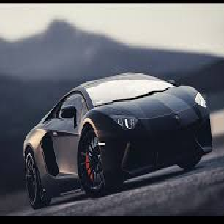

In [102]:
img

In [103]:
x = image.img_to_array(img)

In [104]:
x = x/ 225

In [105]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image

In [106]:
#cleaning the image to predict 

x = np.expand_dims(x, axis = 0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [107]:
#predicting weather the car is Audi, Lamborgini or Mercedes

preds = model.predict(x)
preds = np.argmax(preds, axis =1)
if preds == 1:
    preds = 'The Car Is Audi'
elif preds == 2:
    preds = 'The Car Is Lamborgini'
else:
    preds == 'The Car Is Mercedes'
print(preds)    

1/1 [==============================] - 4s 4s/step
The Car Is Lamborgini
